<a href="https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_03_2_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-558: Applications of Deep Neural Networks
**Module 3: Introduction to TensorFlow**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 3 Material

* Part 3.1: Deep Learning and Neural Network Introduction [[Video]](https://www.youtube.com/watch?v=zYnI4iWRmpc&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_03_1_neural_net.ipynb)
* **Part 3.2: Introduction to Tensorflow and Keras** [[Video]](https://www.youtube.com/watch?v=PsE73jk55cE&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_03_2_keras.ipynb)
* Part 3.3: Saving and Loading a Keras Neural Network [[Video]](https://www.youtube.com/watch?v=-9QfbGM1qGw&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_03_3_save_load.ipynb)
* Part 3.4: Early Stopping in Keras to Prevent Overfitting [[Video]](https://www.youtube.com/watch?v=m1LNunuI2fk&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_03_4_early_stop.ipynb)
* Part 3.5: Extracting Weights and Manual Calculation [[Video]](https://www.youtube.com/watch?v=7PWgx16kH8s&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_03_5_weights.ipynb)

# Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.

In [1]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Note: using Google CoLab


# Part 3.2: Introduction to Tensorflow and Keras

TensorFlow [[Cite:GoogleTensorFlow]](https://research.google/pubs/pub45381/) is an open-source software library for machine learning in various kinds of perceptual and language understanding tasks. It is currently used for research and production by different teams in many commercial Google products, such as speech recognition, Gmail, Google Photos, and search, many of which had previously used its predecessor DistBelief. TensorFlow was originally developed by the Google Brain team for Google's research and production purposes and later released under the Apache 2.0 open source license on November 9, 2015.

* [TensorFlow Homepage](https://www.tensorflow.org/)
* [TensorFlow GitHib](https://github.com/tensorflow/tensorflow)
* [TensorFlow Google Groups Support](https://groups.google.com/forum/#!forum/tensorflow)
* [TensorFlow Google Groups Developer Discussion](https://groups.google.com/a/tensorflow.org/forum/#!forum/discuss)
* [TensorFlow FAQ](https://www.tensorflow.org/resources/faq)

## Why TensorFlow

* Supported by Google
* Works well on Windows, Linux, and Mac
* Excellent GPU support
* Python is an easy to learn programming language
* Python is extremely popular in the data science community

## Deep Learning Tools
TensorFlow is not the only game in town. The biggest competitor to TensorFlow/Keras is PyTorch. Listed below are some of the deep learning toolkits actively being supported:

* **[TensorFlow](https://www.tensorflow.org/)** - Google's deep learning API.  The focus of this class, along with Keras.
* **[Keras](https://keras.io/)** - Acts as a higher-level to Tensorflow.
* **[PyTorch](https://pytorch.org/)** - PyTorch is an open-source machine learning library based on the Torch library, used for computer vision and natural language applications processing. Facebook's AI Research lab primarily develops PyTorch. 

Other deep learning tools:

* **[Deeplearning4J](http://deeplearning4j.org/)** - Java-based. Supports all major platforms. GPU support in Java!
* **[H2O](http://www.h2o.ai/)** - Java-based.  

In my opinion, the two primary Python libraries for deep learning are PyTorch and Keras. Generally, PyTorch requires more lines of code to perform the deep learning applications presented in this course. This trait of PyTorch gives Keras an easier learning curve than PyTorch. However, if you are creating entirely new neural network structures in a research setting, PyTorch can make for easier access to some of the low-level internals of deep learning.

## Using TensorFlow Directly

Most of the time in the course, we will communicate with TensorFlow using Keras [[Cite:franccois2017deep]](https://www.manning.com/books/deep-learning-with-python), which allows you to specify the number of hidden layers and create the neural network. TensorFlow is a low-level mathematics API, similar to [Numpy](http://www.numpy.org/). However, unlike Numpy, TensorFlow is built for deep learning. TensorFlow compiles these compute graphs into highly efficient C++/[CUDA](https://en.wikipedia.org/wiki/CUDA) code.

## TensorFlow Linear Algebra Examples

TensorFlow is a library for linear algebra. Keras is a higher-level abstraction for neural networks that you build upon TensorFlow. In this section, I will demonstrate some basic linear algebra that directly employs TensorFlow and does not use Keras. First, we will see how to multiply a row and column matrix.

In [2]:
import tensorflow as tf

# Create a Constant op that produces a 1x2 matrix.  The op is
# added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.
matrix1 = tf.constant([[3., 3.]])

# Create another Constant that produces a 2x1 matrix.
matrix2 = tf.constant([[2.],[2.]])

# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
product = tf.matmul(matrix1, matrix2)

print(product)
print(float(product))

tf.Tensor([[12.]], shape=(1, 1), dtype=float32)
12.0


This example multiplied two TensorFlow constant tensors.  Next, we will see how to subtract a constant from a variable.

In [3]:
import tensorflow as tf

x = tf.Variable([1.0, 2.0])
a = tf.constant([3.0, 3.0])

# Add an op to subtract 'a' from 'x'.  Run it and print the result
sub = tf.subtract(x, a)
print(sub)
print(sub.numpy())
# ==> [-2. -1.]

tf.Tensor([-2. -1.], shape=(2,), dtype=float32)
[-2. -1.]


Of course, variables are only useful if their values can be changed.  The program can accomplish this change in value by calling the assign function.

In [4]:
x.assign([4.0, 6.0])

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float32, numpy=array([4., 6.], dtype=float32)>

The program can now perform the subtraction with this new value.

In [5]:
sub = tf.subtract(x, a)
print(sub)
print(sub.numpy())

tf.Tensor([1. 3.], shape=(2,), dtype=float32)
[1. 3.]


In the next section, we will see a TensorFlow example that has nothing to do with neural networks.

## TensorFlow Mandelbrot Set Example

Next, we examine another example where we use TensorFlow directly. To demonstrate that TensorFlow is mathematical and does not only provide neural networks, we will also first use it for a non-machine learning rendering task. The code presented here can render a [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set).

In [6]:
import tensorflow as tf
import numpy as np

import PIL.Image
from io import BytesIO
from IPython.display import Image, display

def render(a):
  a_cyclic = (a*0.3).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  return PIL.Image.fromarray(a)

#@tf.function
def mandelbrot_helper(grid_c, current_values, counts,cycles):
  
  for i in range(cycles):
    temp = current_values*current_values + grid_c
    not_diverged = tf.abs(temp) < 4
    current_values.assign(temp),
    counts.assign_add(tf.cast(not_diverged, tf.float32))

def mandelbrot(render_size,center,zoom,cycles):
  f = zoom/render_size[0]
  real_start = center[0]-(render_size[0]/2)*f
  real_end = real_start + render_size[0]*f 
  imag_start = center[1]-(render_size[1]/2)*f
  imag_end = imag_start + render_size[1]*f 

  real_range = tf.range(real_start,real_end,f,dtype=tf.float64)
  imag_range = tf.range(imag_start,imag_end,f,dtype=tf.float64)
  real, imag = tf.meshgrid(real_range,imag_range)
  grid_c = tf.constant(tf.complex(real, imag))
  current_values = tf.Variable(grid_c)
  counts = tf.Variable(tf.zeros_like(grid_c, tf.float32))

  mandelbrot_helper(grid_c, current_values,counts,cycles)
  return counts.numpy()

With the above code defined, we can now calculate and render a Mandlebrot plot.

(640, 480)


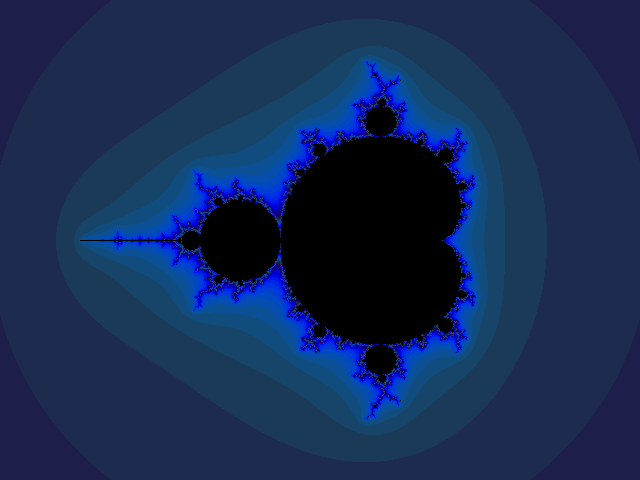

In [7]:
counts = mandelbrot(
    #render_size=(3840,2160), # 4K
    #render_size=(1920,1080), # HD
    render_size=(640,480),
    center=(-0.5,0),
    zoom=4,
    cycles=200
)  
img = render(counts)
print(img.size)
img

#img.save("test.png")

Mandlebrot rendering programs are both simple and infinitely complex at the same time. This view shows the entire Mandlebrot universe simultaneously, as a view completely zoomed out. However, if you zoom in on any non-black portion of the plot, you will find infinite hidden complexity. 

## Introduction to Keras

[Keras](https://keras.io/) is a layer on top of Tensorflow that makes it much easier to create neural networks. Rather than define the graphs, as you see above, you set the individual layers of the network with a much more high-level API. Unless you are researching entirely new structures of deep neural networks, it is unlikely that you need to program TensorFlow directly.  

**For this class, we will usually use TensorFlow through Keras, rather than direct TensorFlow**

## Simple TensorFlow Regression: MPG

This example shows how to encode the MPG dataset for regression and predict values. We will see if we can predict the miles per gallon (MPG) for a car based on the car's weight, cylinders, engine size, and other features.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])

cars = df['name']

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas to Numpy
x = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']].values
y = df['mpg'].values # regression

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

Epoch 1/100
13/13 - 1s - loss: 413038.0312 - 899ms/epoch - 69ms/step
Epoch 2/100
13/13 - 0s - loss: 44668.8086 - 26ms/epoch - 2ms/step
Epoch 3/100
13/13 - 0s - loss: 2309.4172 - 25ms/epoch - 2ms/step
Epoch 4/100
13/13 - 0s - loss: 4703.3457 - 27ms/epoch - 2ms/step
Epoch 5/100
13/13 - 0s - loss: 1011.0455 - 24ms/epoch - 2ms/step
Epoch 6/100
13/13 - 0s - loss: 294.9523 - 26ms/epoch - 2ms/step
Epoch 7/100
13/13 - 0s - loss: 307.1341 - 26ms/epoch - 2ms/step
Epoch 8/100
13/13 - 0s - loss: 218.0309 - 26ms/epoch - 2ms/step
Epoch 9/100
13/13 - 0s - loss: 219.1556 - 37ms/epoch - 3ms/step
Epoch 10/100
13/13 - 0s - loss: 213.8666 - 30ms/epoch - 2ms/step
Epoch 11/100
13/13 - 0s - loss: 211.7289 - 25ms/epoch - 2ms/step
Epoch 12/100
13/13 - 0s - loss: 210.9123 - 26ms/epoch - 2ms/step
Epoch 13/100
13/13 - 0s - loss: 209.8233 - 23ms/epoch - 2ms/step
Epoch 14/100
13/13 - 0s - loss: 209.6022 - 24ms/epoch - 2ms/step
Epoch 15/100
13/13 - 0s - loss: 207.6449 - 23ms/epoch - 2ms/step
Epoch 16/100
13/13 - 0s 

## Introduction to Neural Network Hyperparameters

If you look at the above code, you will see that the neural network contains four layers. The first layer is the input layer because it contains the **input_dim** parameter that the programmer sets to be the number of inputs the dataset has. The network needs one input neuron for every column in the data set (including dummy variables).  

There are also several hidden layers, with 25 and 10 neurons each. You might be wondering how the programmer chose these numbers. Selecting a hidden neuron structure is one of the most common questions about neural networks. Unfortunately, there is no right answer. These are hyperparameters. They are settings that can affect neural network performance, yet there are no clearly defined means of setting them.

In general, more hidden neurons mean more capability to fit complex problems. However, too many neurons can lead to overfitting and lengthy training times. Too few can lead to underfitting the problem and will sacrifice accuracy. Also, how many layers you have is another hyperparameter. In general, more layers allow the neural network to perform more of its feature engineering and data preprocessing. But this also comes at the expense of training times and the risk of overfitting. In general, you will see that neuron counts start larger near the input layer and tend to shrink towards the output layer in a triangular fashion. 

Some techniques use machine learning to optimize these values. These will be discussed in [Module 8.3](t81_558_class_08_3_keras_hyperparameters.ipynb).

## Controlling the Amount of Output

The program produces one line of output for each training epoch. You can eliminate this output by setting the verbose setting of the fit command:

* **verbose=0** - No progress output (use with Jupyter if you do not want output).
* **verbose=1** - Display progress bar, does not work well with Jupyter.
* **verbose=2** - Summary progress output (use with Jupyter if you want to know the loss at each epoch).

## Regression Prediction

Next, we will perform actual predictions. The program assigns these predictions to the **pred** variable. These are all MPG predictions from the neural network. Notice that this is a 2D array? You can always see the dimensions of what Keras returns by printing out **pred.shape**. Neural networks can return multiple values, so the result is always an array. Here the neural network only returns one value per prediction (there are 398 cars, so 398 predictions). However, a 2D range is needed because the neural network has the potential of returning more than one value.   

In [9]:
pred = model.predict(x)
print(f"Shape: {pred.shape}")
print(pred[0:10])

13/13 [==============================] - 0s 2ms/step
Shape: (398, 1)
[[  6.4946475 ]
 [ -1.4639096 ]
 [  0.90947294]
 [  4.3877444 ]
 [  5.919086  ]
 [ -6.61369   ]
 [-13.806806  ]
 [-11.002057  ]
 [-12.531537  ]
 [ -8.827008  ]]


We would like to see how good these predictions are.  We know the correct MPG for each car so we can measure how close the neural network was.

In [10]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"Final score (RMSE): {score}")

Final score (RMSE): 10.546612492020849


The number printed above is the average number of predictions above or below the expected output. We can also print out the first ten cars with predictions and actual MPG.

In [11]:
# Sample predictions
for i in range(10):
    print(f"{i+1}. Car name: {cars[i]}, MPG: {y[i]}, " 
          + f"predicted MPG: {pred[i]}")

1. Car name: chevrolet chevelle malibu, MPG: 18.0, predicted MPG: [6.4946475]
2. Car name: buick skylark 320, MPG: 15.0, predicted MPG: [-1.4639096]
3. Car name: plymouth satellite, MPG: 18.0, predicted MPG: [0.90947294]
4. Car name: amc rebel sst, MPG: 16.0, predicted MPG: [4.3877444]
5. Car name: ford torino, MPG: 17.0, predicted MPG: [5.919086]
6. Car name: ford galaxie 500, MPG: 15.0, predicted MPG: [-6.61369]
7. Car name: chevrolet impala, MPG: 14.0, predicted MPG: [-13.806806]
8. Car name: plymouth fury iii, MPG: 14.0, predicted MPG: [-11.002057]
9. Car name: pontiac catalina, MPG: 14.0, predicted MPG: [-12.531537]
10. Car name: amc ambassador dpl, MPG: 15.0, predicted MPG: [-8.827008]


## Simple TensorFlow Classification: Iris

Classification is how a neural network attempts to classify the input into one or more classes.  The simplest way of evaluating a classification network is to track the percentage of training set items classified incorrectly.  We typically score human results in this manner.  For example, you might have taken multiple-choice exams in school in which you had to shade in a bubble for choices A, B, C, or D.  If you chose the wrong letter on a 10-question exam, you would earn a 90%.  In the same way, we can grade computers; however, most classification algorithms do not merely choose A, B, C, or D.  Computers typically report a classification as their percent confidence in each class.  Figure 3.EXAM shows how a computer and a human might respond to question number 1 on an exam.

**Figure 3.EXAM: Classification Neural Network Output**
![Classification Neural Network Output](images/class-multi-choice.png "Classification Neural Network Output")

As you can see, the human test taker marked the first question as "B." However, the computer test taker had an 80% (0.8) confidence in "B" and was also somewhat sure with 10% (0.1) on "A." The computer then distributed the remaining points to the other two.  In the simplest sense, the machine would get 80% of the score for this question if the correct answer were "B." The computer would get only 5% (0.05) of the points if the correct answer were "D." 

We previously saw how to train a neural network to predict the MPG of a car. Based on four measurements, we will now see how to predict a class, such as the type of iris flower. The code to classify iris flowers is similar to MPG; however, there are several important differences:

* The output neuron count matches the number of classes (in the case of Iris, 3).
* The Softmax transfer function is utilized by the output layer.* The loss function is cross entropy.

In [12]:
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/iris.csv", 
    na_values=['NA', '?'])

# Convert to numpy - Classification
x = df[['sepal_l', 'sepal_w', 'petal_l', 'petal_w']].values
dummies = pd.get_dummies(df['species']) # Classification
species = dummies.columns
y = dummies.values


# Build neural network
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(y.shape[1],activation='softmax')) # Output

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

Epoch 1/100
5/5 - 1s - loss: 1.3445 - 683ms/epoch - 137ms/step
Epoch 2/100
5/5 - 0s - loss: 1.0927 - 16ms/epoch - 3ms/step
Epoch 3/100
5/5 - 0s - loss: 0.9501 - 14ms/epoch - 3ms/step
Epoch 4/100
5/5 - 0s - loss: 0.8675 - 12ms/epoch - 2ms/step
Epoch 5/100
5/5 - 0s - loss: 0.8230 - 13ms/epoch - 3ms/step
Epoch 6/100
5/5 - 0s - loss: 0.7676 - 15ms/epoch - 3ms/step
Epoch 7/100
5/5 - 0s - loss: 0.7086 - 12ms/epoch - 2ms/step
Epoch 8/100
5/5 - 0s - loss: 0.6553 - 13ms/epoch - 3ms/step
Epoch 9/100
5/5 - 0s - loss: 0.6111 - 13ms/epoch - 3ms/step
Epoch 10/100
5/5 - 0s - loss: 0.5751 - 12ms/epoch - 2ms/step
Epoch 11/100
5/5 - 0s - loss: 0.5506 - 15ms/epoch - 3ms/step
Epoch 12/100
5/5 - 0s - loss: 0.5186 - 12ms/epoch - 2ms/step
Epoch 13/100
5/5 - 0s - loss: 0.4985 - 15ms/epoch - 3ms/step
Epoch 14/100
5/5 - 0s - loss: 0.4786 - 15ms/epoch - 3ms/step
Epoch 15/100
5/5 - 0s - loss: 0.4627 - 12ms/epoch - 2ms/step
Epoch 16/100
5/5 - 0s - loss: 0.4464 - 14ms/epoch - 3ms/step
Epoch 17/100
5/5 - 0s - loss: 

In [13]:
# Print out number of species found:

print(species)

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')


Now that you have a neural network trained, we would like to be able to use it. The following code makes use of our neural network. Exactly like before, we will generate predictions. Notice that three values come back for each of the 150 iris flowers. There were three types of iris (Iris-setosa, Iris-versicolor, and Iris-virginica).  

In [14]:
pred = model.predict(x)
print(f"Shape: {pred.shape}")
print(pred[0:10])

5/5 [==============================] - 0s 2ms/step
Shape: (150, 3)
[[9.9837053e-01 1.6292597e-03 8.6608864e-08]
 [9.9569184e-01 4.3077413e-03 4.8975153e-07]
 [9.9725705e-01 2.7426661e-03 3.0202315e-07]
 [9.9437964e-01 5.6193592e-03 8.9626747e-07]
 [9.9853426e-01 1.4655263e-03 7.9451141e-08]
 [9.9796093e-01 2.0388844e-03 7.7782097e-08]
 [9.9677557e-01 3.2241149e-03 3.9646301e-07]
 [9.9739981e-01 2.5998016e-03 1.8548003e-07]
 [9.9305910e-01 6.9391779e-03 1.6089251e-06]
 [9.9603933e-01 3.9602704e-03 3.9319173e-07]]


If you would like to turn of scientific notation, the following line can be used:

In [15]:
np.set_printoptions(suppress=True)

Now we see these values rounded up.

In [16]:
print(y[0:10])

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


Usually, the program considers the column with the highest prediction to be the prediction of the neural network.  It is easy to convert the predictions to the expected iris species.  The argmax function finds the index of the maximum prediction for each row.

In [17]:
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y,axis=1)
print(f"Predictions: {predict_classes}")
print(f"Expected: {expected_classes}")

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Expected: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Of course, it is straightforward to turn these indexes back into iris species. We use the species list that we created earlier.

In [18]:
print(species[predict_classes[1:10]])

Index(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'],
      dtype='object')


Accuracy might be a more easily understood error metric.  It is essentially a test score.  For all of the iris predictions, what percent were correct?  The downside is it does not consider how confident the neural network was in each prediction.

In [19]:
from sklearn.metrics import accuracy_score

correct = accuracy_score(expected_classes,predict_classes)
print(f"Accuracy: {correct}")

Accuracy: 0.98


The code below performs two ad hoc predictions.  The first prediction is a single iris flower, and the second predicts two iris flowers.  Notice that the **argmax** in the second prediction requires **axis=1**?  Since we have a 2D array now, we must specify which axis to take the **argmax** over.  The value **axis=1** specifies we want the max column index for each row.

In [20]:
sample_flower = np.array( [[5.0,3.0,4.0,2.0]], dtype=float)
pred = model.predict(sample_flower)
print(pred)
pred = np.argmax(pred)
print(f"Predict that {sample_flower} is: {species[pred]}")

1/1 [==============================] - 0s 24ms/step
[[0.00065811 0.36459202 0.6347499 ]]
Predict that [[5. 3. 4. 2.]] is: Iris-virginica


You can also predict two sample flowers.

In [21]:
sample_flower = np.array( [[5.0,3.0,4.0,2.0],[5.2,3.5,1.5,0.8]],\
        dtype=float)
pred = model.predict(sample_flower)
print(pred)
pred = np.argmax(pred,axis=1)
print(f"Predict that these two flowers {sample_flower} ")
print(f"are: {species[pred]}")

1/1 [==============================] - 0s 20ms/step
[[0.00065811 0.36459225 0.63474965]
 [0.99432015 0.00567923 0.00000056]]
Predict that these two flowers [[5.  3.  4.  2. ]
 [5.2 3.5 1.5 0.8]] 
are: Index(['Iris-virginica', 'Iris-setosa'], dtype='object')
